# Assault Incidents Increase on Weekends of Summer 2014 compared to Weekdays, while Theft and Drug Incidents Decrease
Over the summer of 2014 (01/06/14-31/08/14), 28,993 crime-related incidents were reported in San Francisco in total, across ten police districts. On average, about 2,900 incidents were reported per district. Most of the reported incidents occurred in the Southern District - about 5,400 incidents, nearly 20% of the total.

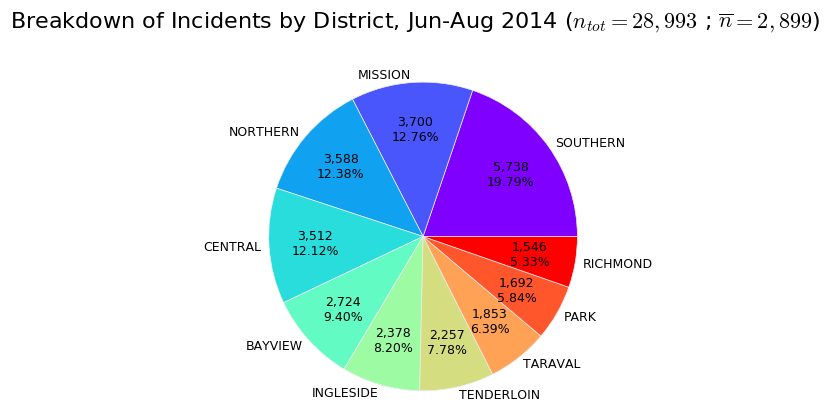

In [344]:
# imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# format integer with 1,000's commas
def intWithCommas(x):
    if x < 0:
        return '-' + intWithCommas(-x)
    result = ''
    while x >= 1000:
        x, r = divmod(x, 1000)
        result = ",%03d%s" % (r, result)
    return "%d%s" % (x, result)

# define plot style and params
mpl.style.use('ggplot')
params = {'font.size': 9,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'figure.subplot.hspace': 0.3}
plt.rcParams.update(params)

# read data from CSV into pandas dataframe
sf_data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

# plot breakdown of incidents by district
fig, ax = plt.subplots()
fig.suptitle('Breakdown of Incidents by District, Jun-Aug 2014 ($n_{tot}=%s$ ; $\overline{n}=%s$)' % (intWithCommas(sf_data.index.size),
                                                                                                      intWithCommas(sf_data.groupby(['PdDistrict']).size().mean())), 
             fontsize=16,
             y=1.08)
sf_data.groupby(['PdDistrict']).size().sort_values(ascending=False).plot(kind='pie',
                                                                         colormap='rainbow',
                                                                         autopct= lambda p: '%s\n%.2f%%' % (intWithCommas(p*sf_data.index.size/100),
                                                                                                            p),
                                                                         ax=ax,
                                                                         labeldistance=1.05,
                                                                         pctdistance=0.7)
ax.set_ylabel('')
ax.axis('equal')

plt.show()

This report will focus on crime patterns in the Southern District, as it has the highest number of reported incidents. LARCENY/THEFT, ASSAULT and DRUG/NARCOTIC are the most prevalent types of reported crimes in the district, about 56%, 12% and 5% respectively. 
Incidents that are not actual crimes (i.e. warrants and non-criminal activities reported to the police), as well as uncategorized incidents (i.e. those categorized as "other offenses"), were excluded from further analyses.

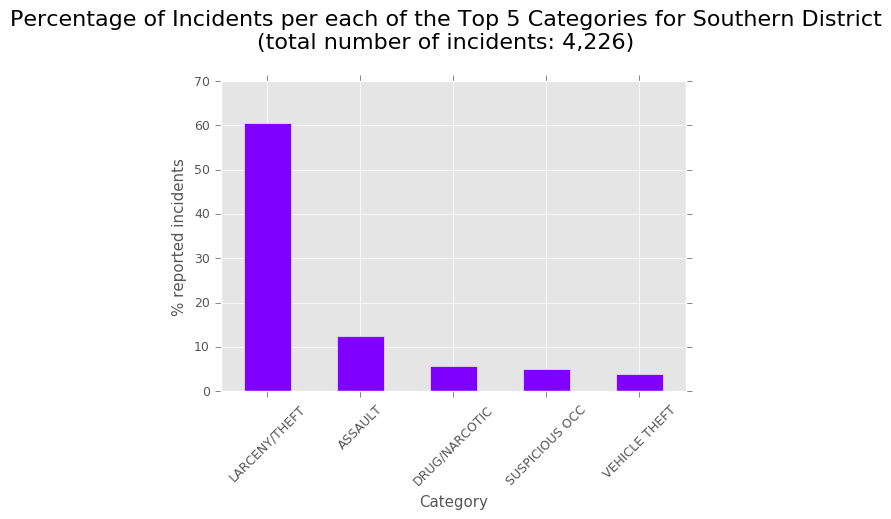

In [217]:
# get top 5 categories for SOUTHERN, excluding 'OTHER OFFENSES', 'WARRANTS' and 'NON-CRIMINAL'
cats = sf_data[(~sf_data.Category.isin(['OTHER OFFENSES','WARRANTS','NON-CRIMINAL'])) &
               (sf_data.PdDistrict=='SOUTHERN')].groupby('Category').size().nlargest(5).index.values

# plot number of incidents per category, per district
fig, ax = plt.subplots()
fig.suptitle('Percentage of Incidents per each of the Top 5 Categories for Southern District\n(total number of incidents: %s)' % intWithCommas(sf_data[~(sf_data.Category.isin(['NON-CRIMINAL','WARRANTS','OTHER OFFENSES'])) &
                                                                                                                                                       (sf_data.PdDistrict=='SOUTHERN')].index.size),
             fontsize=16,
             y=1.08)
(100*sf_data[sf_data.Category.isin(cats) &
         (sf_data.PdDistrict=='SOUTHERN')].groupby(['Category']).size()/\
sf_data[(sf_data.PdDistrict=='SOUTHERN') &
        (~sf_data.Category.isin(['NON-CRIMINAL','WARRANTS','OTHER OFFENSES']))].index.size).sort_values(ascending=False)\
        .plot(kind='bar',
              colormap='rainbow',
              ax=ax,
              rot=45)

ax.set_ylabel('% reported incidents')
plt.show()

The numbers of criminal incidets for each of the top three crime categories: LARCENY/THEFT, ASSAULT and DRUG/NARCOTIC were broken down by day. Each subplot shows the distribution of occurrences per day of the week, for each category. The distribution average is shown in purple, the 25-75 quantile ranges are shown in red, the ~2.7 * STDEV limits are shown in black, outliers are shown as black crosses.
This breakdown shows a few interesting trends:
- Assault incidents tend to remain more or less the same thorughout the week; the weekends show slightly higher numbers of such incidents compared to weekdays.
- Drug/narcotic-related crimes tend to increase slightly on Thursdays and Fridays (i.e. just before weekends), then decrease on Saturdays and Sundays.
- Larceny/theft incidents tend to increase towards the weekend, especially on Fridays and Saturdays, then sharply decrease on Sundays.

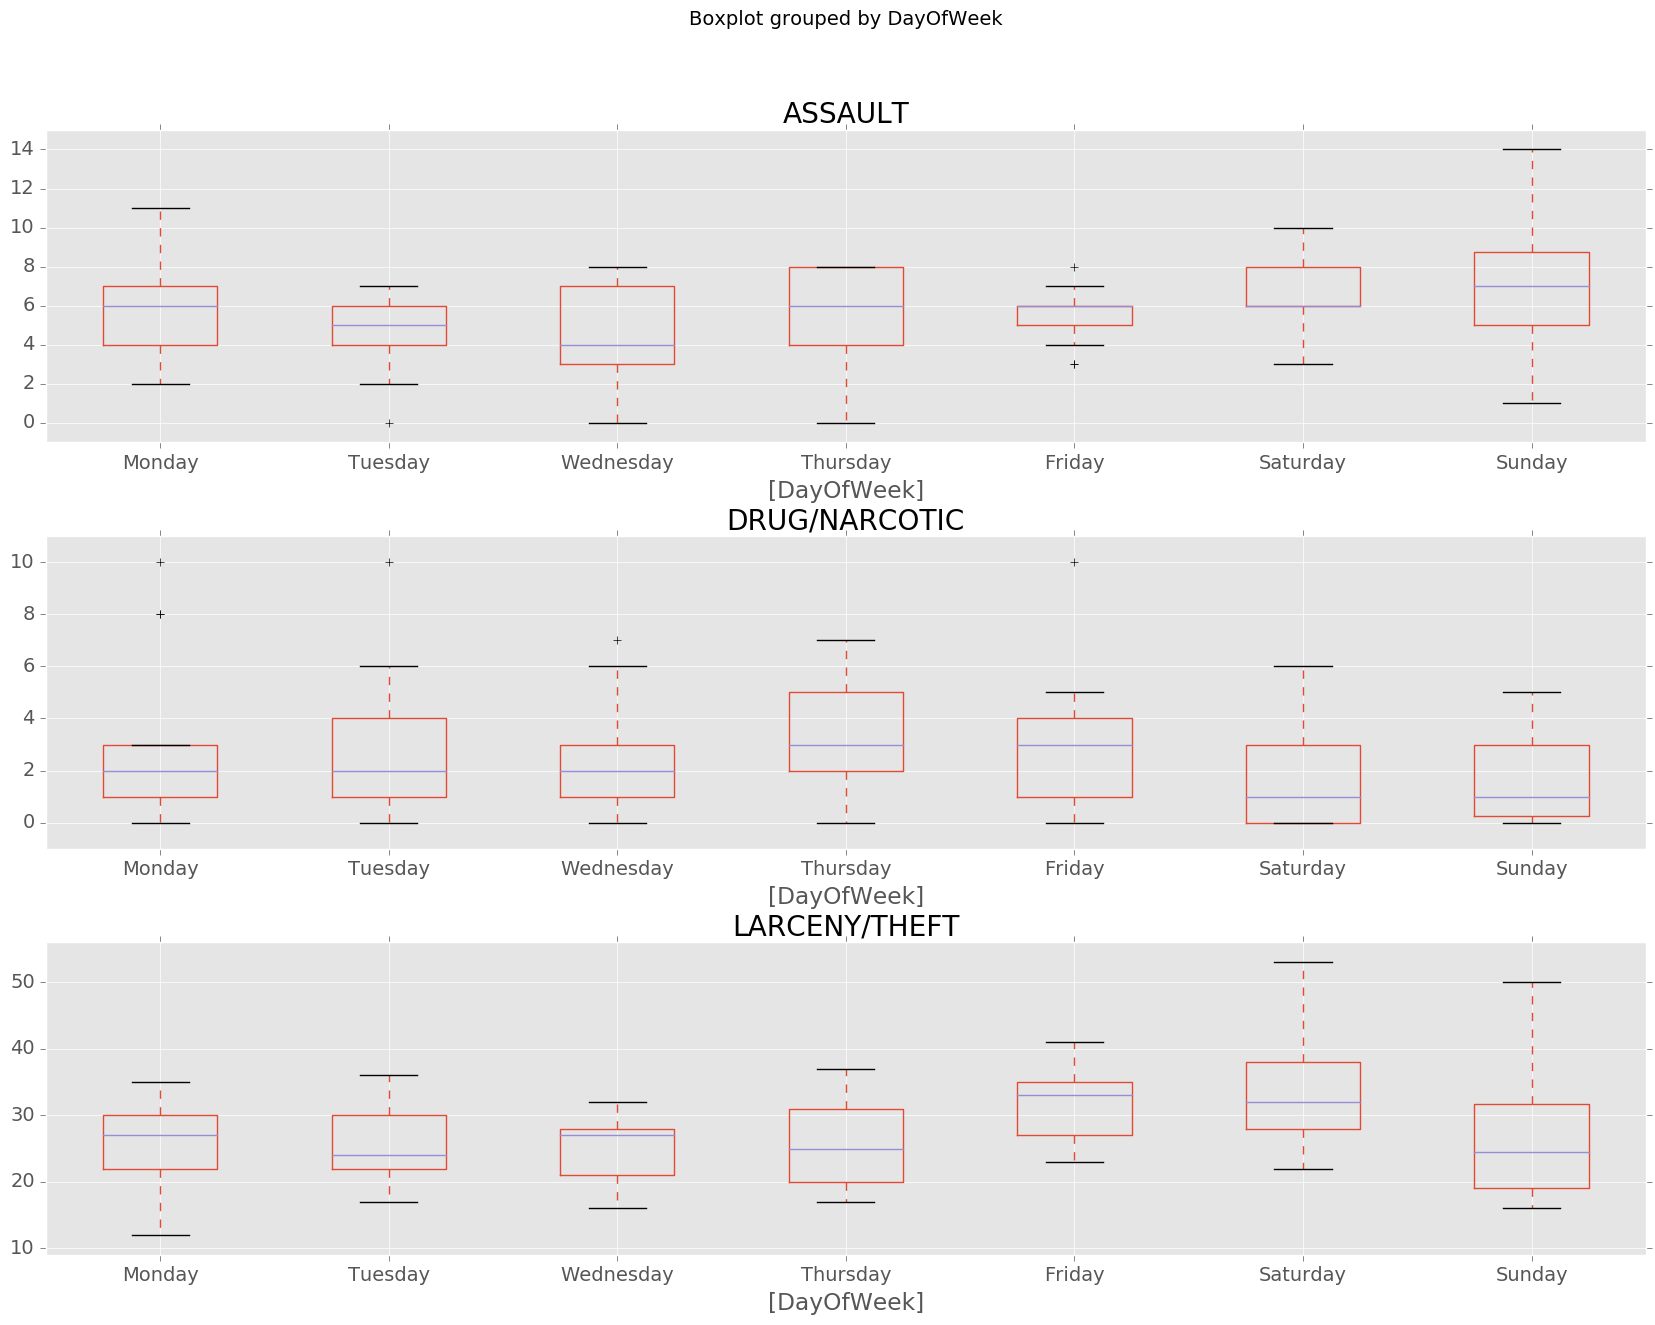

In [386]:
# define plot style and params
mpl.style.use('ggplot')
params = {'font.size': 14}
plt.rcParams.update(params)

fig, axes = plt.subplots(3, sharex=False, sharey=False)

plot_df = sf_data[(sf_data.Category.isin(['LARCENY/THEFT','ASSAULT','DRUG/NARCOTIC'])) & (sf_data.PdDistrict=='SOUTHERN')]\
          .replace({'DayOfWeek': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}})\
          .groupby(['Category','DayOfWeek','Date']).size().unstack(level=0).fillna(0).reset_index()

plot_df.boxplot(by='DayOfWeek',
                ax=axes,
      rot=0,
        return_type='axes')
for ax in axes:
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax.set_ylim(ax.get_ylim()[0]-1, ax.get_ylim()[1]+1)
fig.set_size_inches(20, 15)
plt.show()

The trends described above suggest some interesting insights:
- Assualts, which stem from confrontaitional interactions, tend to occur more frequently on weekends, when people have more free time and are more prone to visit social venues, possibly under the influence of various substances. In particular, consumption of alcohol has been associated with violence and can therefore serve to elucidate this trend.
- Drug-related crime reports are relatively scarce in the Southern District of San Francisco, therefore the observed fluctuations in their numbers do not lead to any particularly significant conclusions.
- Larceny and theft incidents tend to drop on Sundays after increasing on Fridays and Saturdays, which stands to reason - most theft incidents increase as thieves prepare for Sundays, when most people are at home or away with their vehicles (making it impossible to break into the vehicle and steal any valuables from within). The wider distributions for Saturdays and Sundays suggest somewhat erratic enforcement on these days, possibly due to a diminished police presence.